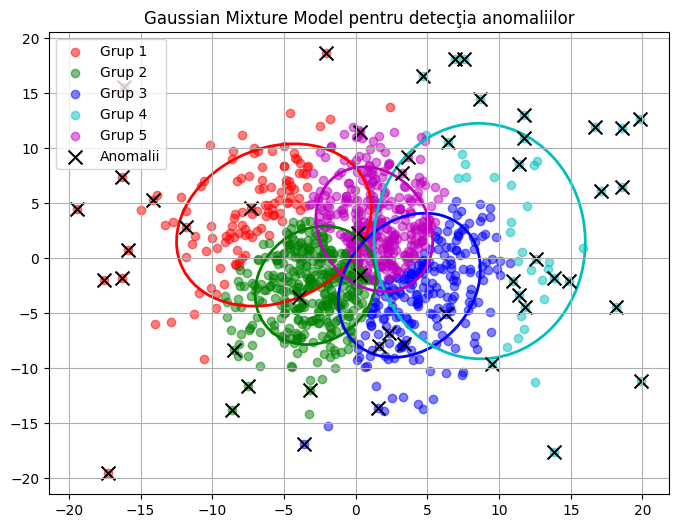

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

# Generate random data with anomalies
np.random.seed(0)
normal_data = np.random.randn(1000, 2) * 5  # Normal data points with larger spread
# Randomly place anomalies away from clusters
anomaly_data = np.random.uniform(low=-20, high=20, size=(50, 2))  # Anomaly data points
data = np.vstack([normal_data, anomaly_data])

# Fit Gaussian Mixture Model
n_components = 5  # Number of components (clusters)
gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm.fit(data)

# Predict the clusters
labels = gmm.predict(data)

# Plot the clusters
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'c', 'm']  # Colors for different clusters
for i in range(n_components):
    plt.scatter(data[labels == i, 0], data[labels == i, 1], c=colors[i], label=f'Grup {i+1}', alpha=0.5)

# Plot the ellipses representing the clusters
for i, (mean, cov) in enumerate(zip(gmm.means_, gmm.covariances_)):
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
    width, height = 2 * np.sqrt(2) * np.sqrt(eigenvalues)
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle, edgecolor=colors[i], fc='None', lw=2)
    plt.gca().add_patch(ellipse)

# Plot anomalies with a different marker
plt.scatter(anomaly_data[:, 0], anomaly_data[:, 1], c='k', marker='x', label='Anomalii', s=100)
plt.title('Gaussian Mixture Model pentru detecţia anomaliilor')
plt.legend()
plt.grid(True)
plt.savefig('gmm_anomalies.pdf')
plt.show()
